In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import os

# Importing dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
# Load the data
data = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Exploring the data

In [3]:
# Count of education levels
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [4]:
# Count of workclass categories
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [5]:
# Count of occupation categories
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
# Count of gender categories
data.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [7]:
# Preprocessing the data
data = pd.concat([data.drop('occupation', axis=1), pd.get_dummies(data.occupation).add_prefix('occupation_')], axis = 1)
data = pd.concat([data.drop('workclass', axis=1), pd.get_dummies(data.workclass).add_prefix('workclass_')], axis = 1)
data = data.drop('education',axis=1)
data = pd.concat([data.drop('marital-status', axis=1), pd.get_dummies(data['marital-status']).add_prefix('marital-status_')], axis = 1)
data = pd.concat([data.drop('relationship', axis=1), pd.get_dummies(data.relationship).add_prefix('relationship_')], axis = 1)
data = pd.concat([data.drop('race', axis=1), pd.get_dummies(data.race).add_prefix('race_')], axis = 1)
data = pd.concat([data.drop('native-country', axis=1), pd.get_dummies(data['native-country']).add_prefix('native-country_')], axis = 1)

In [8]:
data.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
# Mapping categorical values to numerical values
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [10]:
data.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
# Extracting column names
data.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

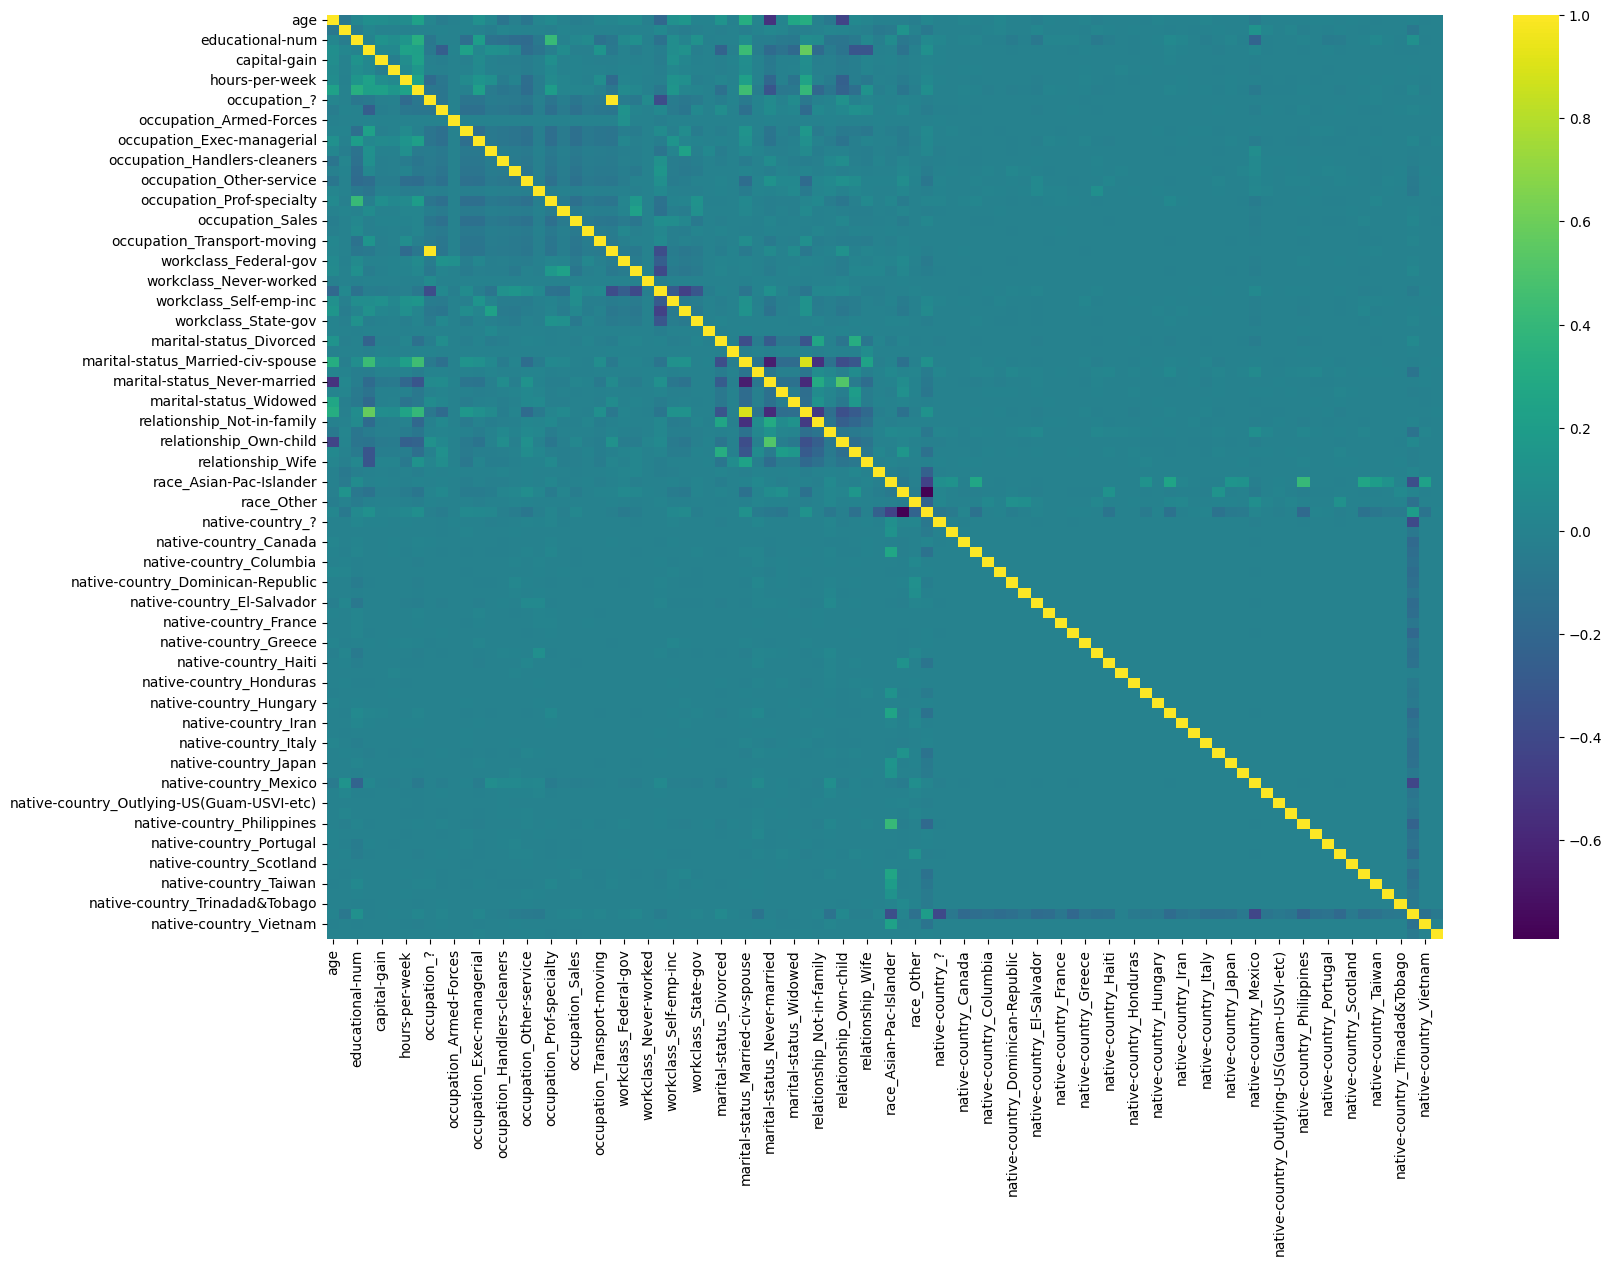

In [12]:
# Visualizing correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=False, cmap='viridis')

In [13]:
data.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [14]:
# Removing highly correlated features
correlations = data.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(data.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
data_dropped = data.drop(cols_to_drop, axis=1)

In [15]:
data_dropped.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

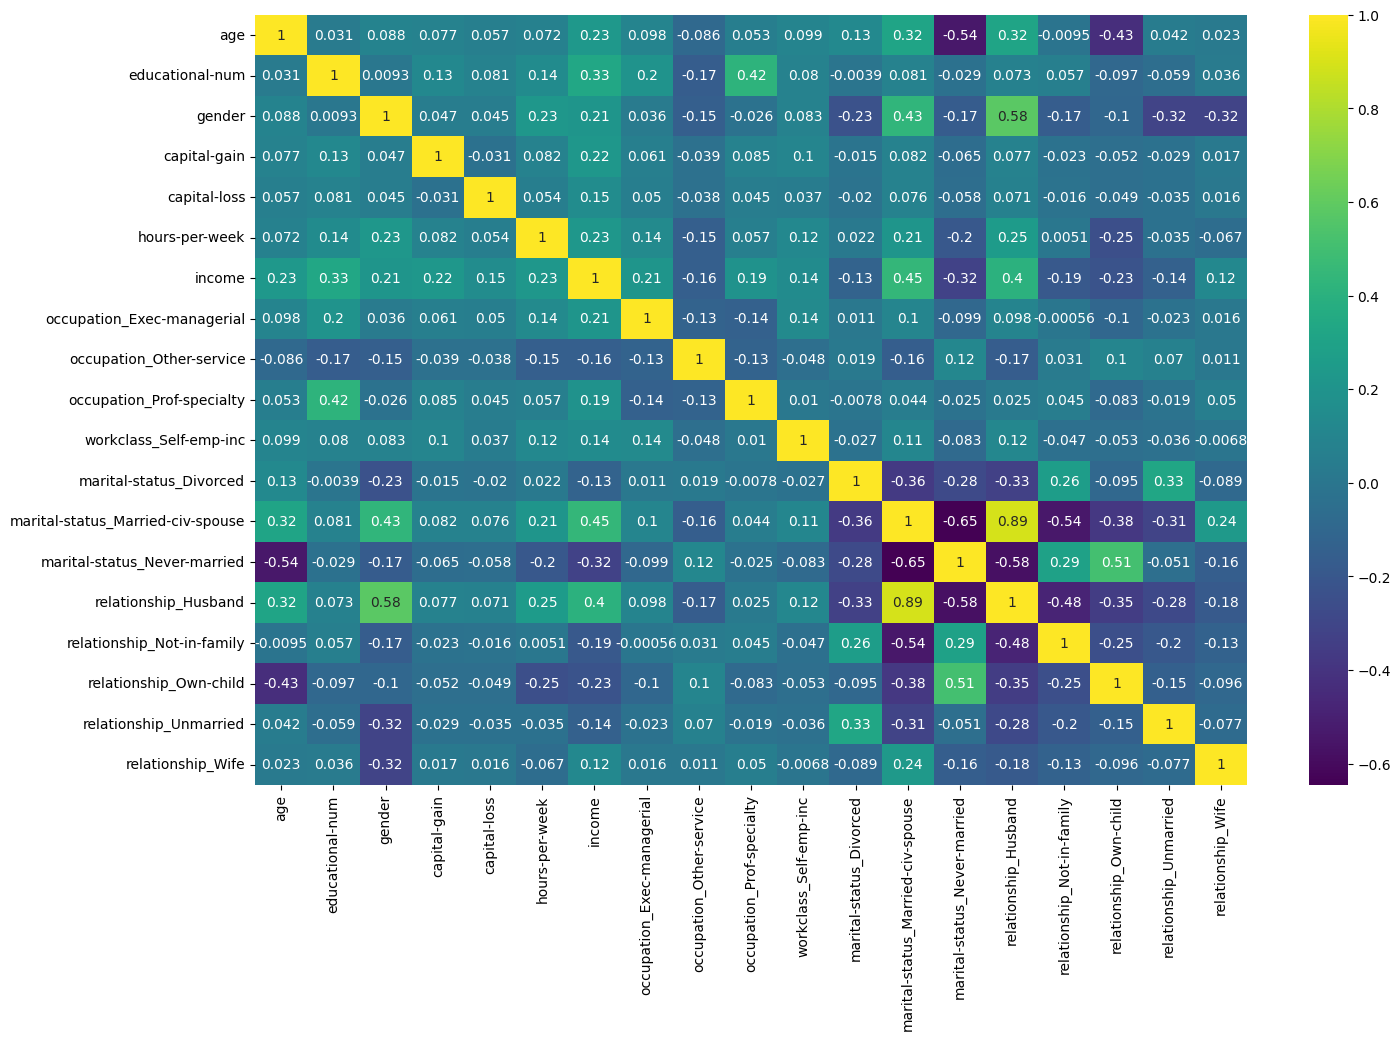

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(data_dropped.corr(), annot=True, cmap='viridis')

In [17]:
# Train Test Split
data = data.drop('fnlwgt', axis=1)
train_data , test_data = train_test_split(data, test_size=0.2)

In [18]:
train_data.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
32373,58,13,0,0,0,20,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11705,42,12,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
13549,24,10,1,0,0,24,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35230,43,6,1,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
22166,43,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
test_data.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
44969,20,10,0,0,0,40,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
337,56,6,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42629,59,9,1,0,0,41,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
47546,20,11,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43268,37,13,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
train_X = train_data.drop('income',axis=1)
train_y = train_data['income']

test_X = test_data.drop('income',axis=1)
test_y = test_data['income']

In [21]:
# Random Forest Classifier
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [22]:
# Checking accuracy
forest.score(test_X, test_y)

0.8499334629951889

In [23]:
# Extracting feature names
forest.feature_importances_

array([2.26261882e-01, 1.27821735e-01, 1.10209182e-02, 1.03643305e-01,
       3.83252925e-02, 1.13644591e-01, 1.98165854e-03, 4.99432708e-03,
       5.27251789e-05, 6.19065778e-03, 1.97655815e-02, 5.04864457e-03,
       3.40913387e-03, 4.21555080e-03, 7.91716324e-03, 2.22420296e-04,
       1.95199223e-02, 3.11086703e-03, 6.71887077e-03, 4.50507576e-03,
       4.35876088e-03, 1.69695863e-03, 4.88545136e-03, 5.32731613e-03,
       3.20251896e-06, 9.21202859e-03, 6.10993738e-03, 7.55935761e-03,
       4.35605903e-03, 1.21708107e-04, 8.04333820e-03, 3.49111849e-04,
       6.75793881e-02, 9.55166629e-04, 3.04465422e-02, 2.11890942e-03,
       1.79921515e-03, 5.41799962e-02, 1.06469156e-02, 1.79590934e-03,
       9.40541766e-03, 5.49349441e-03, 1.06740866e-02, 1.31088534e-03,
       3.22552924e-03, 4.70553067e-03, 9.95734916e-04, 6.15912877e-03,
       2.81002997e-03, 2.11021905e-04, 1.46564460e-03, 6.05521259e-04,
       2.51127046e-04, 8.43132261e-04, 2.14358054e-04, 1.97909427e-04,
      

## Calculating feature importance using the Random Forest model
## This attribute provides the relative importance of each feature in the model
## Feature importance is measured based on the contribution of each feature to reducing impurity (e.g., Gini impurity) across all trees in the forest
## Higher values indicate greater importance, suggesting that the feature plays a more significant role in predicting the target variable
## Feature importance values are normalized to sum up to 1 across all features
## Helps in identifying key features that influence the prediction outcome
## Useful for feature selection and understanding the underlying relationships between predictors and the target variable

## 'forest' refers to the trained Random Forest model that has already been fit to the dataset
## Accessing the 'feature_importances_' attribute of the Random Forest model to obtain the importance scores of each feature
## This attribute contains an array where each element represents the importance of the corresponding feature in the dataset
## The position of each element in the array corresponds to the index of the feature in the dataset
## It is important to ensure that the features in the dataset are in the same order as when the model was trained to correctly interpret the feature importance values
## These feature importance values can be used for further analysis, such as identifying the most influential features or for visualization purposes


In [24]:
# Extracting feature names
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

## Extracting feature names from the trained Random Forest model
## 'forest' refers to the Random Forest model that has already been trained and fitted to the dataset
## Accessing the 'feature_names_in_' attribute of the Random Forest model to obtain the names of the features used during training
## This attribute contains the names of the features as they were provided in the input data when the model was trained
## The order of feature names corresponds to the order of features in the dataset
## These feature names are useful for understanding which predictors were included in the model and their respective positions
## It's essential to ensure that the feature names are correctly aligned with the feature importance scores and other model attributes for accurate interpretation
## The feature names can be used for various purposes such as feature selection, interpreting model results, and communicating with stakeholders


In [25]:
# Mapping feature names to importance score
importances = dict(zip(forest.feature_names_in_ , forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [26]:
importances

{'age': 0.2262618821488915,
 'educational-num': 0.12782173498620056,
 'hours-per-week': 0.11364459133828282,
 'capital-gain': 0.10364330515332307,
 'marital-status_Married-civ-spouse': 0.067579388117139,
 'relationship_Husband': 0.05417999623573714,
 'capital-loss': 0.03832529246547812,
 'marital-status_Never-married': 0.03044654216565503,
 'occupation_Exec-managerial': 0.019765581546261634,
 'occupation_Prof-specialty': 0.019519922251287618,
 'gender': 0.011020918177003474,
 'relationship_Wife': 0.010674086642766496,
 'relationship_Not-in-family': 0.010646915585865533,
 'relationship_Own-child': 0.009405417659623617,
 'workclass_Private': 0.009212028586683994,
 'marital-status_Divorced': 0.008043338201577325,
 'occupation_Other-service': 0.00791716324130326,
 'workclass_Self-emp-not-inc': 0.007559357605412946,
 'occupation_Sales': 0.006718870772197527,
 'native-country_United-States': 0.006311135081252172,
 'occupation_Craft-repair': 0.006190657784296974,
 'race_White': 0.006159128765

## Feature importance results
## The dictionary represents the importance scores of different features in the dataset, as determined by the Random Forest model
## Each key-value pair corresponds to a feature name and its importance score, respectively
## The importance score indicates the relative contribution of each feature to the predictive performance of the model
## Higher scores imply greater importance, suggesting that the feature has a stronger influence on the model's predictions
## Features with higher importance scores are considered more influential in predicting the target variable
## Conversely, features with lower importance scores have less impact on the model's predictions
## Feature importance scores are useful for understanding which features are most informative for the model and for feature selection purposes
## In this specific case, the most important features include 'age', 'educational-num', 'hours-per-week', 'capital-gain', etc.
## These features have higher importance scores, indicating their significant contribution to the model's predictive performance
## On the other hand, features with importance scores close to zero or zero are considered less important by the model
## For instance, 'native-country_Holand-Netherlands' has an importance score of zero, suggesting it has no impact on the model's predictions

In [27]:
# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator= RandomForestClassifier(),
                          param_grid = param_grid, verbose=10)

In [28]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.7s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.7s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.7s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [29]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

In [30]:
# Finalizing the model
forest = grid_search.best_estimator_
# Checking accuracy after tuning
forest.score(test_X, test_y)

0.8588391851776026

In [31]:
# Extracting feature importance after tuning
importances = dict(zip(forest.feature_names_in_ , forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [32]:
importances

{'age': 0.144544729417611,
 'capital-gain': 0.13249635686404287,
 'educational-num': 0.13069879254700123,
 'hours-per-week': 0.0899296160241855,
 'marital-status_Married-civ-spouse': 0.0783478593476019,
 'relationship_Husband': 0.06480524555960555,
 'capital-loss': 0.046198016181405836,
 'marital-status_Never-married': 0.0336066502410963,
 'occupation_Exec-managerial': 0.024881839957842045,
 'occupation_Prof-specialty': 0.022625606586428777,
 'relationship_Not-in-family': 0.018759309503644118,
 'gender': 0.018597992450914928,
 'relationship_Own-child': 0.015046961726728805,
 'relationship_Wife': 0.013994560557671745,
 'occupation_Other-service': 0.011209834190735811,
 'marital-status_Divorced': 0.009517708406860684,
 'relationship_Unmarried': 0.00839578459223014,
 'workclass_Self-emp-not-inc': 0.008182629001405105,
 'workclass_Private': 0.007934343704893786,
 'workclass_Self-emp-inc': 0.0075218773580482375,
 'occupation_Farming-fishing': 0.0058431677835342625,
 'native-country_United-S

## Final comments:
## Compared to the previous importance results, there are some differences in the importance scores of individual features
## 'age', 'capital-gain', and 'educational-num' remain among the top important features, indicating their consistent influence on the model's predictions
## However, the ranking and importance scores of some features have changed
## For example, 'hours-per-week' and 'marital-status_Married-civ-spouse' have relatively higher importance scores in this set compared to the previous one
## Conversely, some features that were relatively more important in the previous set, such as 'relationship_Wife' and 'occupation_Exec-managerial', have lower scores here
## These changes in importance scores might suggest variations in the dataset or model training process
## Overall, understanding the relative importance of features can provide insights into which variables are most relevant for predicting the target variable
## It's essential to consider these importance scores when interpreting the model's predictions and making decisions based on them.